# Degeneration effect : repeated avatarization on WBCD - Python

In order to look at the effect of an avatarization, we avatarized an avatarized dataset.  
We repeat this operation multiple times.

This notebook generate avatarized datasets and visualize results.

## Importation and loading 

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys

sys.path.append("../../../../lsg")
from lsg.dimension import Projection
from lsg import avatarize

from matplotlib.patches import Patch, Ellipse
import matplotlib.transforms as transforms
from matplotlib import pyplot as plt


from lsg.evaluation_tools.visualization import projection_plot

In [4]:
colors = pd.read_csv("../../color.csv", index_col=0)
colors

,color
type,
avatar,#67C6A7
original,#f5f5f5
k_small,#c6eade
k_high,#407c68
benign,#6786c6
malignant,#e19252
wbcd,#a767c6
aids,#c6a767


## Avatarisation 

In [44]:
df = pd.read_csv("../../datasets/WBCD/breast_cancer_wisconsin.csv")
df.drop(columns="Sample_code_number", inplace=True)
df["iter"] = 0
# df.drop(columns='iter', inplace= True)

df = df.astype("category")
df_list = [df]

The following cell is repeatedly avatarizing the avatarized dataset.   
The operation required the avarization package. Owner : Octopize.

In [50]:
to_avat

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,iter
0,5,1,1,1,2,1,3,1,1,2,0
1,5,4,4,5,7,10,3,2,1,2,0
2,3,1,1,1,2,2,3,1,1,2,0
3,6,8,8,1,3,4,3,7,1,2,0
4,4,1,1,3,2,1,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2,0
679,2,1,1,1,2,1,1,1,1,2,0
680,5,10,10,3,7,3,8,10,2,4,0
681,4,8,6,4,3,4,10,6,1,4,0


In [56]:
for iter in range(1, 21):

    to_avat = df_list[-1].copy()
    to_avat.drop(columns="iter", inplace=True)
    to_avat = to_avat.astype("category")

    for col in to_avat.columns:
        to_avat[col] = to_avat[col].cat.remove_unused_categories()

    df_k = avatarize(to_avat, ncp=2, k=20, distance_metric="minkowski", seed=iter)
    df_k["iter"] = iter
    df_list.append(df_k)
    print(iter)

Warning - The random seed was specified, this is dramatically altering privacy protection.
Regarding variables types, a MCA is performed for dimension reduction
1
Warning - The random seed was specified, this is dramatically altering privacy protection.
Regarding variables types, a MCA is performed for dimension reduction
2
Warning - The random seed was specified, this is dramatically altering privacy protection.
Regarding variables types, a MCA is performed for dimension reduction
3
Warning - The random seed was specified, this is dramatically altering privacy protection.
Regarding variables types, a MCA is performed for dimension reduction
4
Warning - The random seed was specified, this is dramatically altering privacy protection.
Regarding variables types, a MCA is performed for dimension reduction
5
Warning - The random seed was specified, this is dramatically altering privacy protection.
Regarding variables types, a MCA is performed for dimension reduction
6
Warning - The random s

In [59]:
df_all = pd.concat(df_list, axis=0)
df_all.to_csv("../../datasets/messageD/wbcd.csv", index=False)

### Import avatarized data

In [62]:
df_all = pd.read_csv("../../datasets/messageD/wbcd.csv")
df_all

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,iter
0,5,1,1,1,2,1,3,1,1,2,0
1,5,4,4,5,7,10,3,2,1,2,0
2,3,1,1,1,2,2,3,1,1,2,0
3,6,8,8,1,3,4,3,7,1,2,0
4,4,1,1,3,2,1,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
14338,1,1,3,2,2,1,3,1,1,2,20
14339,2,1,1,1,2,1,1,1,1,2,20
14340,9,10,10,10,10,10,9,7,1,4,20
14341,5,7,8,5,5,10,7,10,3,4,20


In [65]:
df_all.Class = df_all.Class.astype("object")

In [68]:
df_0 = df_all[df_all["iter"] == 0]  # original data
df_1 = df_all[df_all["iter"] == 1]
df_2 = df_all[df_all["iter"] == 2]
df_3 = df_all[df_all["iter"] == 3]
df_4 = df_all[df_all["iter"] == 4]
df_5 = df_all[df_all["iter"] == 5]
df_6 = df_all[df_all["iter"] == 6]
df_7 = df_all[df_all["iter"] == 7]
df_8 = df_all[df_all["iter"] == 8]
df_10 = df_all[df_all["iter"] == 10]
df_15 = df_all[df_all["iter"] == 15]
df_12 = df_all[df_all["iter"] == 12]


df_20 = df_all[df_all["iter"] == 20]


df_0.drop(columns="iter", inplace=True)
df_1.drop(columns="iter", inplace=True)
df_2.drop(columns="iter", inplace=True)
df_3.drop(columns="iter", inplace=True)
df_4.drop(columns="iter", inplace=True)
df_5.drop(columns="iter", inplace=True)
df_6.drop(columns="iter", inplace=True)
df_7.drop(columns="iter", inplace=True)
df_8.drop(columns="iter", inplace=True)
df_10.drop(columns="iter", inplace=True)
df_15.drop(columns="iter", inplace=True)
df_20.drop(columns="iter", inplace=True)

## Multdimensionnal projection function : requiered dimension projection local function.

This section use projections function (such as FAMD for mixed data) to projecte the avatar data in the original data space.

In [71]:
def projection_plot(
    records_set, avatars_set, variable_visualization, iter, colors=colors
):

    pr = Projection()
    __, mod = pr.fit_transform(records_set, nf=3)
    avat_coordinates = mod.transform(avatars_set)
    var1 = pr.model.explained_variance_ratio[0] * 100
    var2 = pr.model.explained_variance_ratio[1] * 100

    avat_coordinates["modality"] = avatars_set[variable_visualization].values

    paper_rc = {"lines.markersize": 11}
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=3, rc=paper_rc)
    with plt.style.context("seaborn-whitegrid"):
        plt.rcParams["axes.edgecolor"] = "0.15"
        plt.rcParams["axes.linewidth"] = 1.25
        plt.rcParams["font.family"] = "sans-serif"
        plt.rcParams["font.sans-serif"] = ["Helvetica"]
        fig = plt.figure(figsize=(14, 9))  # create a figure object
        ax1 = fig.add_subplot()

    ax1 = sns.scatterplot(
        x="Dim. 1",
        y="Dim. 2",
        data=avat_coordinates,
        hue="modality",
        alpha=1,
        palette=[colors.loc["benign", "color"], colors.loc["malignant", "color"]],
        edgecolor="#1D1D1B",
    )
    ax1.set_xlim(
        avat_coordinates["Dim. 1"].min() - 0.2, avat_coordinates["Dim. 1"].max() + 0.2
    )
    ax1.set_ylim(
        avat_coordinates["Dim. 2"].min() - 0.2, avat_coordinates["Dim. 2"].max() + 0.2
    )
    plt.xlabel("Dim. 1 (" + str(round(var1, 2)) + "%)")
    plt.ylabel("Dim. 2 (" + str(round(var2, 2)) + "%)")
    ax1.set(xlim=(-3, 7.5))
    ax1.set(ylim=(-2.2, 4.9))

    handles, _ = ax1.get_legend_handles_labels()
    plt.legend(loc="upper left", labels=["Benign", "Malignant"], handles=handles[:])

    ax1.set_title("Iteration: {}".format(iter))
    return ax1

In [74]:
df_0

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


Regarding variables types, a FAMD is performed for dimension reduction


<AxesSubplot:xlabel='Dim. 1', ylabel='Dim. 2'>

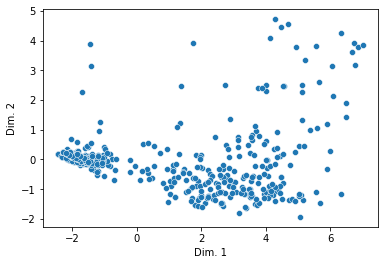

In [77]:
pr = Projection()
coord, mod = pr.fit_transform(df_0, nf=5)
coord.to_csv("../../../coord_lsg_dimension.csv", index=False)
sns.scatterplot(data=coord, x="Dim. 1", y="Dim. 2")

In [80]:
coord

,Dim. 1,Dim. 2,Dim. 3,Dim. 4,Dim. 5
0,-1.633335,-0.101183,0.531049,0.048710,-0.139781
1,1.092753,-0.367917,-0.376358,-0.337524,1.662816
2,-1.748495,-0.068406,-0.054569,-0.084486,-0.057664
3,1.124403,-0.305836,0.320435,1.605072,-0.548206
4,-1.518159,-0.062050,-0.048867,-0.289788,-0.093787
...,...,...,...,...,...
678,-1.872384,0.176924,0.089448,0.106953,0.408701
679,-2.201403,0.211291,-0.156912,0.051959,0.113992
680,4.017701,-0.020681,-0.854176,2.433909,-0.470391
681,2.579000,-1.079710,-1.084581,0.586056,-0.990922


Regarding variables types, a FAMD is performed for dimension reduction


<AxesSubplot:title={'center':'Iteration: 0'}, xlabel='Dim. 1 (67.31%)', ylabel='Dim. 2 (7.93%)'>

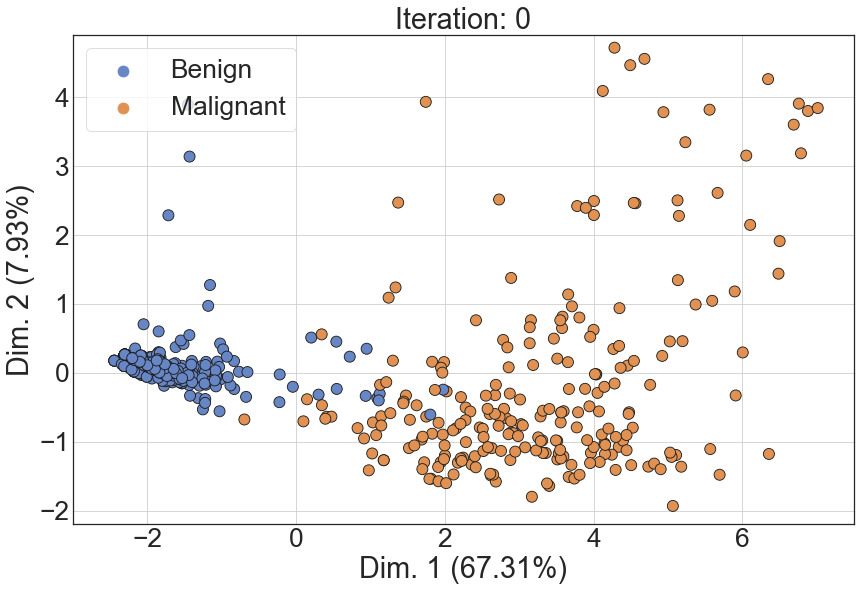

In [83]:
projection_plot(df_0, df_0, "Class", 0, colors=colors)

## Iterations vizualisation

Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction


<Figure size 1008x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

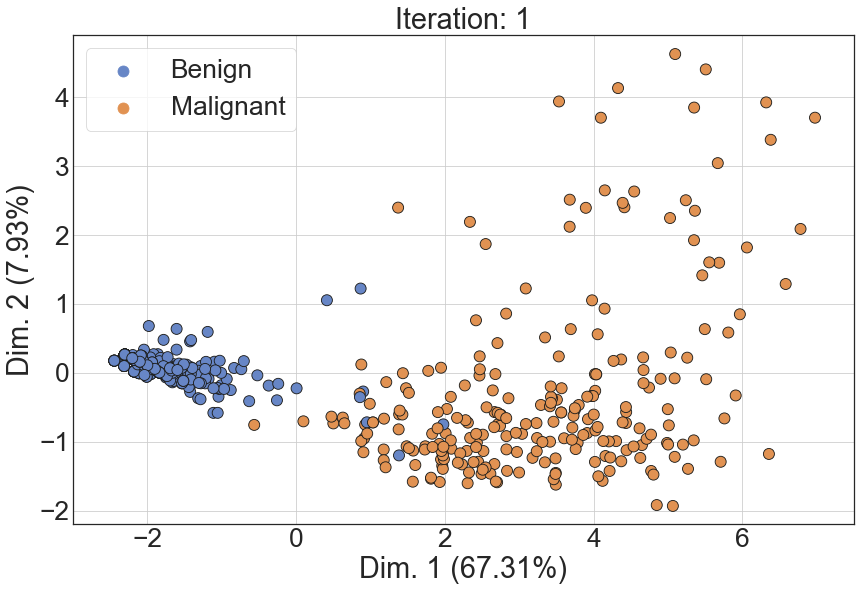

<Figure size 432x288 with 0 Axes>

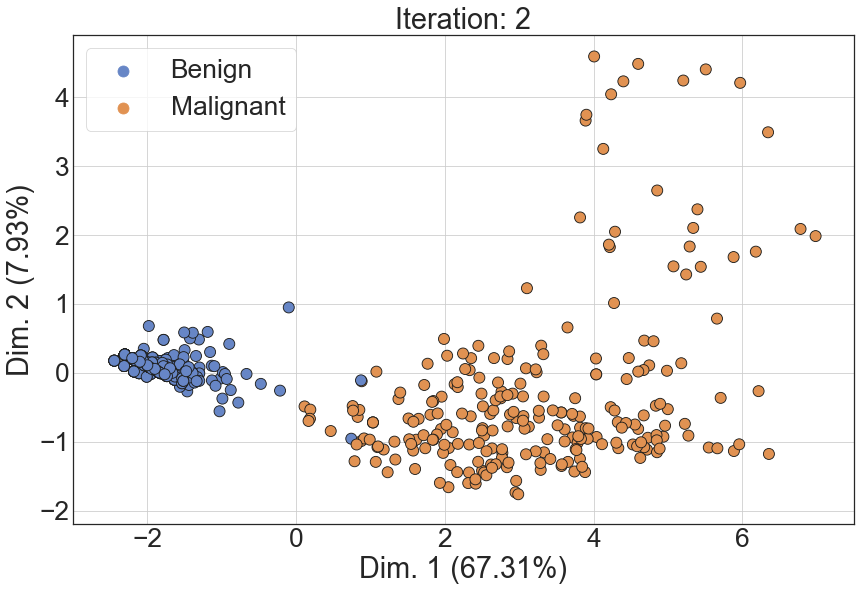

<Figure size 432x288 with 0 Axes>

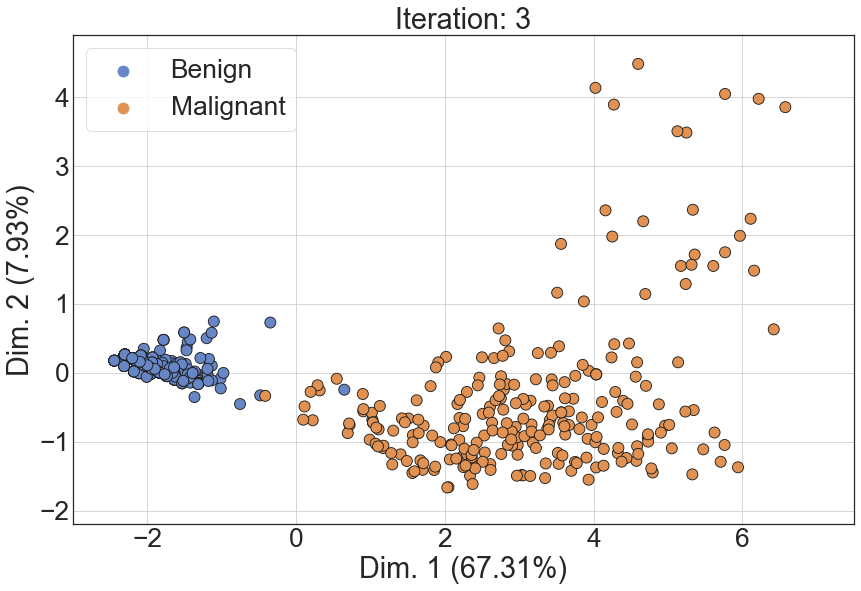

<Figure size 432x288 with 0 Axes>

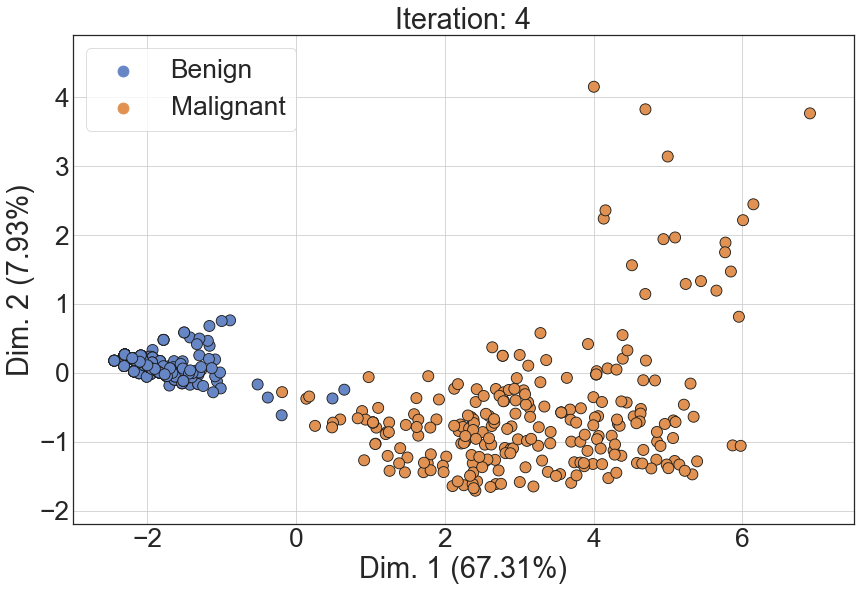

<Figure size 432x288 with 0 Axes>

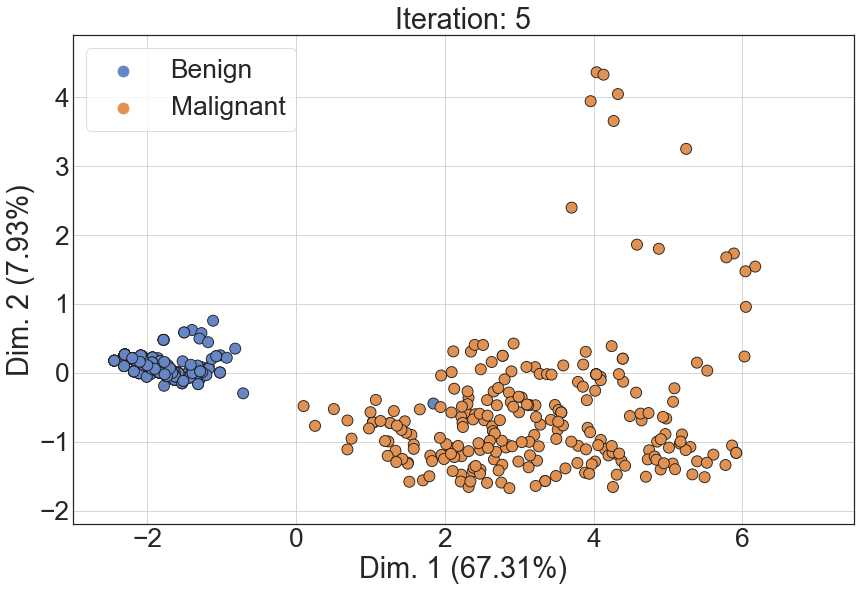

<Figure size 432x288 with 0 Axes>

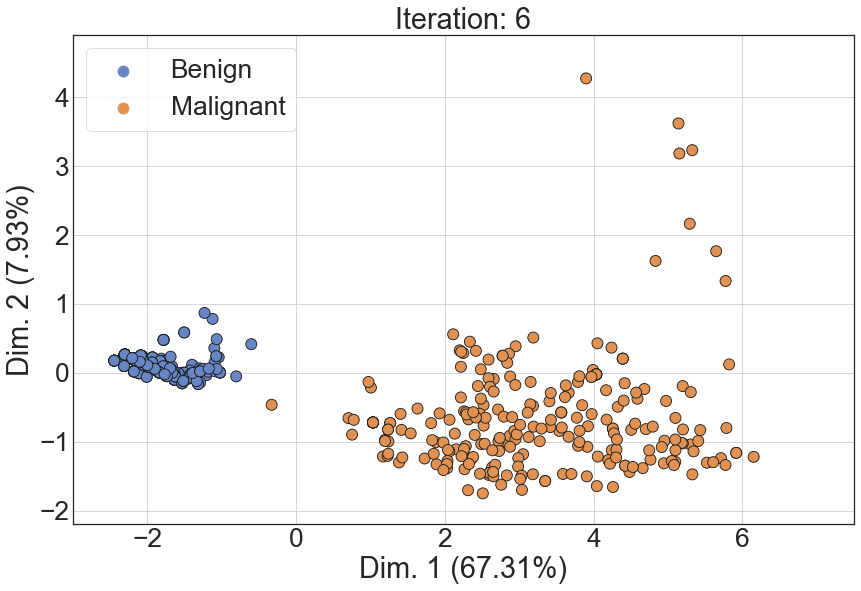

<Figure size 432x288 with 0 Axes>

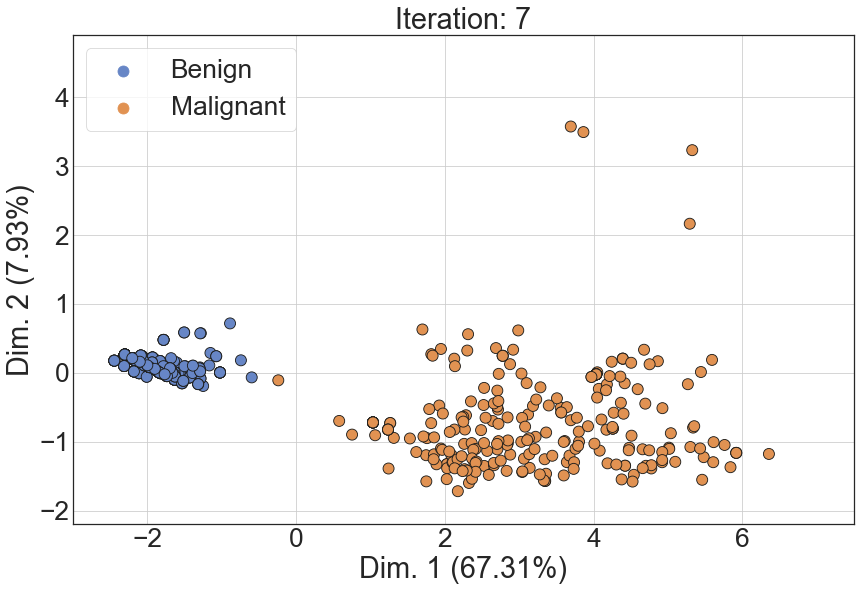

<Figure size 432x288 with 0 Axes>

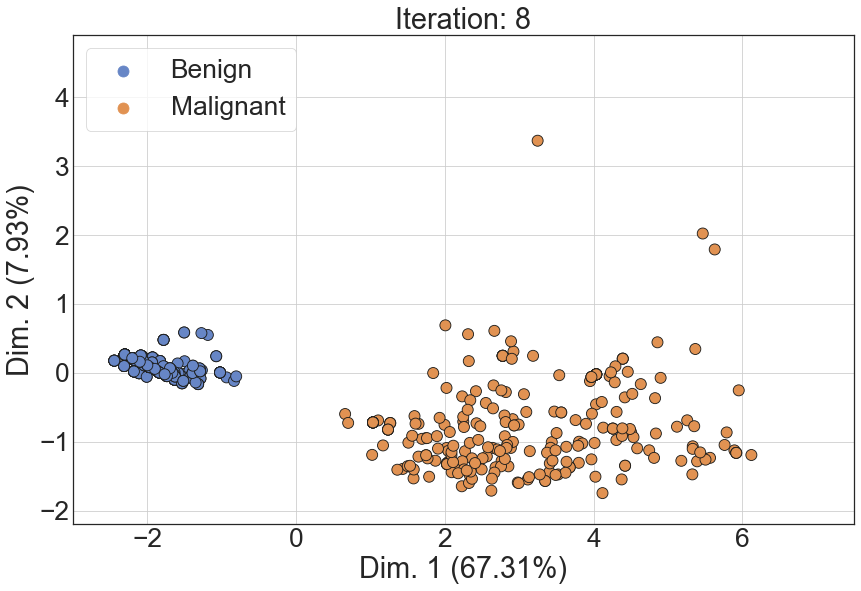

<Figure size 432x288 with 0 Axes>

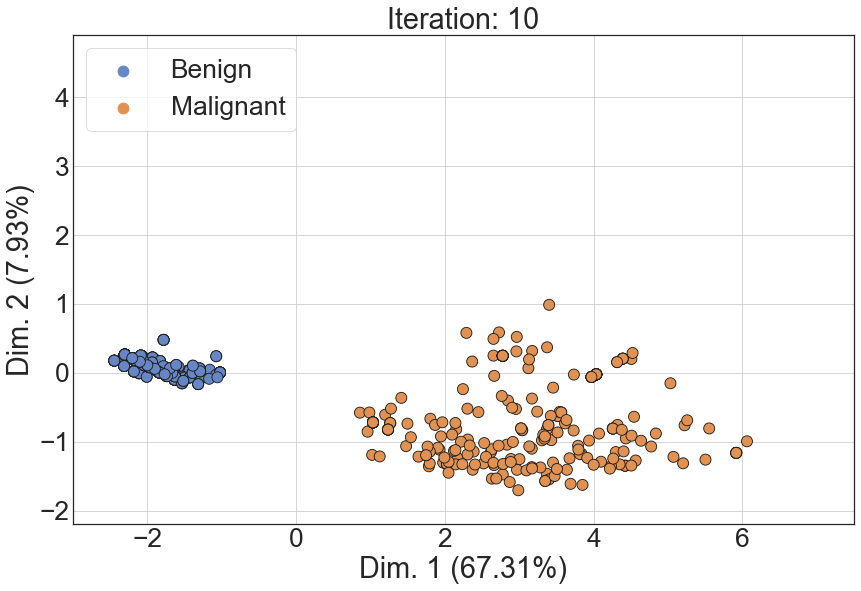

<Figure size 432x288 with 0 Axes>

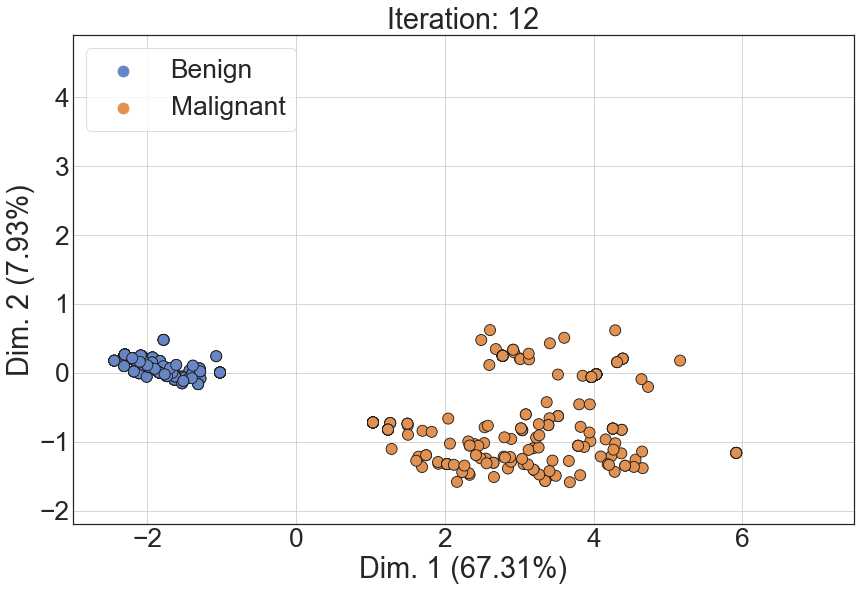

<Figure size 432x288 with 0 Axes>

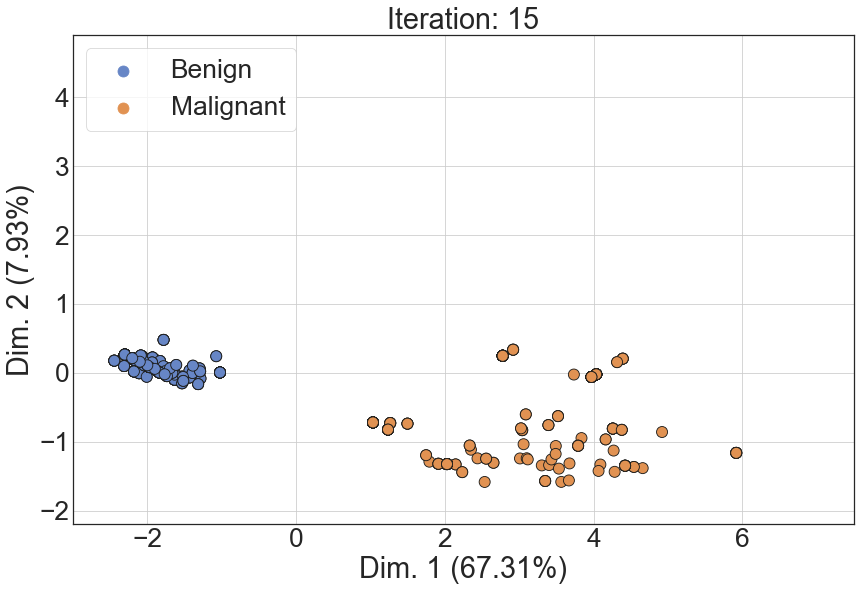

<Figure size 432x288 with 0 Axes>

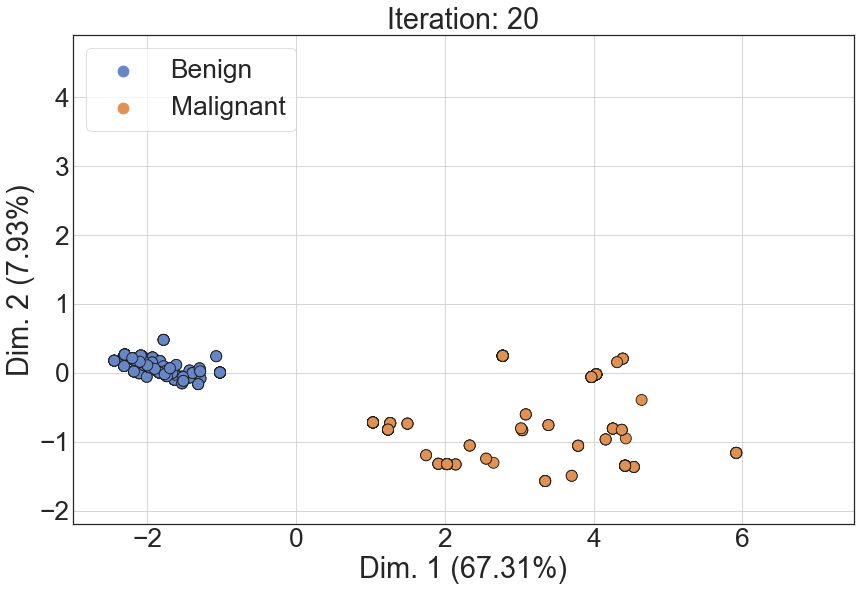

In [86]:
plt.figure(figsize=(14, 10))

list = [
    (df_1, 1),
    (df_2, 2),
    (df_3, 3),
    (df_4, 4),
    (df_5, 5),
    (df_6, 6),
    (df_7, 7),
    (df_8, 8),
    (df_10, 10),
    (df_12, 12),
    (df_15, 15),
    (df_20, 20),
]
for df_temp in list:
    plt.figure()
    projection_plot(df_0, df_temp[0], "Class", df_temp[1])
    plt.show
    plt.savefig(
        "../../figure/wbcd_MESSAGED/wbcd_iteration_{}.svg".format(df_temp[1]),
        format="svg",
        dpi=600,
    )